# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
import pandas as pd
import numpy as np 

df = pd.read_csv('C:\\Users\\David Santos\\Desktop\\lab-problems-in-ml\\data\\boston_data.csv')


df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

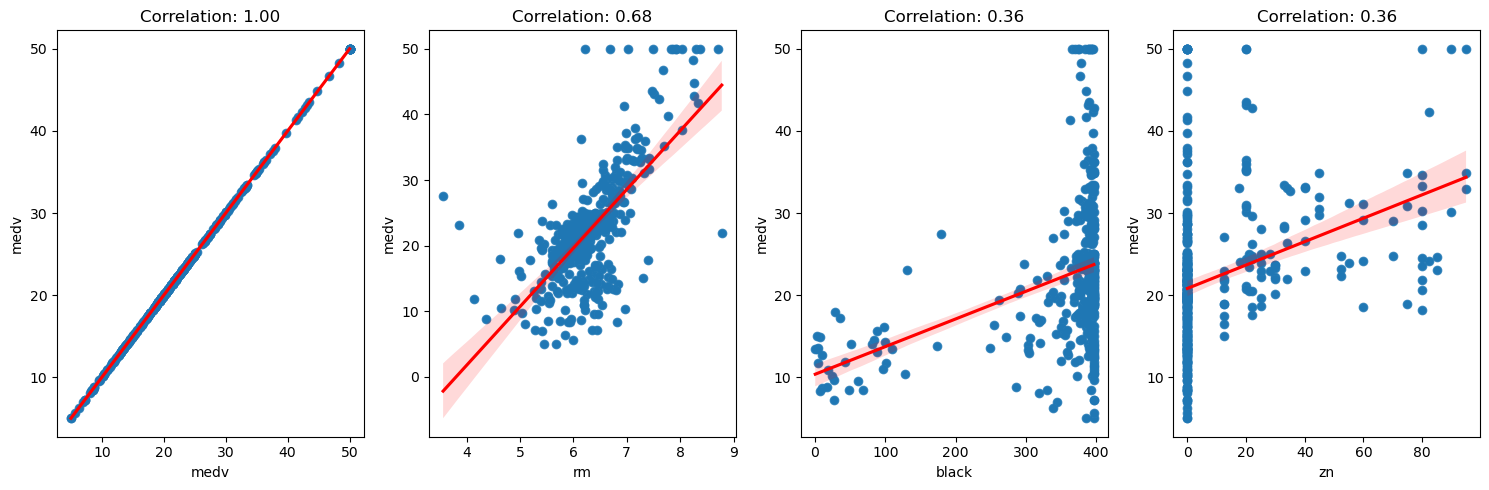

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = df.corr()
correlation_with_medv = correlation_matrix["medv"].sort_values(ascending=False)

top_correlations = correlation_with_medv.head(4)

# scatter plots for the top correlated variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(top_correlations.index):
    plt.subplot(1, 4, i + 1)
    sns.scatterplot(data=df, x=col, y="medv")
    plt.title(f"Correlation: {correlation_with_medv[col]:.2f}")
    sns.regplot(data=df, x=col, y="medv", line_kws={"color": "red"})
    plt.xlabel(col)
    plt.ylabel("medv")

plt.tight_layout()
plt.show()

In [8]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# I somehow was expecting to see other relationships in the variables.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

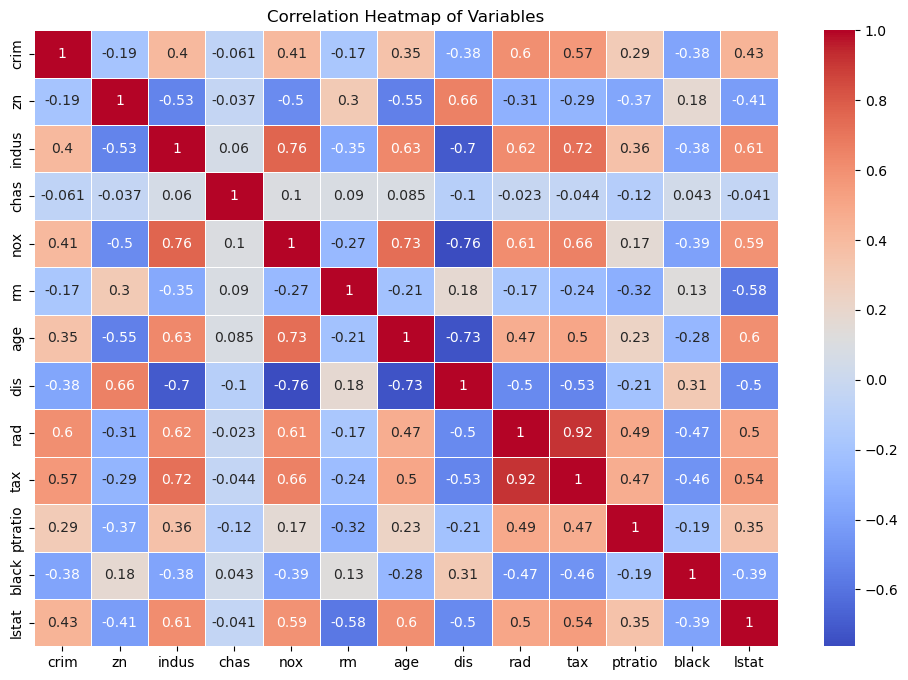

In [9]:

correlation_matrix = df.drop(columns=["medv"]).corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Variables")
plt.show()


#tax and rad for example, 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [10]:
medv_stats = df['medv'].describe()


min_price = medv_stats['min']
max_price = medv_stats['max']
mean_price = medv_stats['mean']
median_price = medv_stats['50%']  
std_deviation = medv_stats['std']


print(f"Minimum Price (MEDV): {min_price:.2f}")
print(f"Maximum Price (MEDV): {max_price:.2f}")
print(f"Mean Price (MEDV): {mean_price:.2f}")
print(f"Median Price (MEDV): {median_price:.2f}")
print(f"Standard Deviation (MEDV): {std_deviation:.2f}")

Minimum Price (MEDV): 5.00
Maximum Price (MEDV): 50.00
Mean Price (MEDV): 22.31
Median Price (MEDV): 21.40
Standard Deviation (MEDV): 8.84


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [14]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Example: You can use a linear regression model


X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate the R-squared score as the performance metric
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the R-squared metric. """
    # Calculate the R-squared score
    score = r2_score(y_true, y_predict)
    return score


r2 = performance_metric(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")

R-squared Score: 0.64


### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [15]:
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y = df['medv']


----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

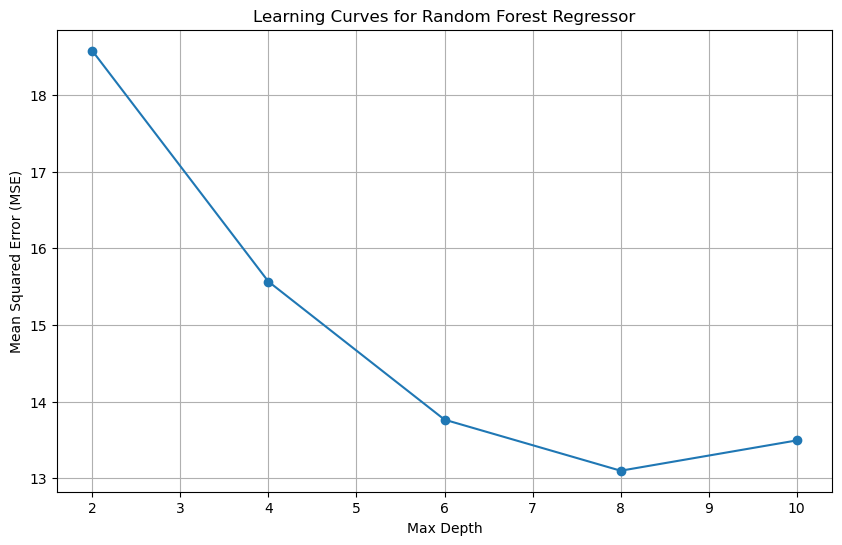

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


scores = []


max_depth_values = [2, 4, 6, 8, 10]

for max_depth in max_depth_values:
    
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
   
    y_pred = model.predict(X_test)
    
    
    mse = mean_squared_error(y_test, y_pred)
    
    
    scores.append(mse)


plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, scores, marker='o', linestyle='-')
plt.title('Learning Curves for Random Forest Regressor')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()

Now, plot the score for each tree on the training set and on the testing set.

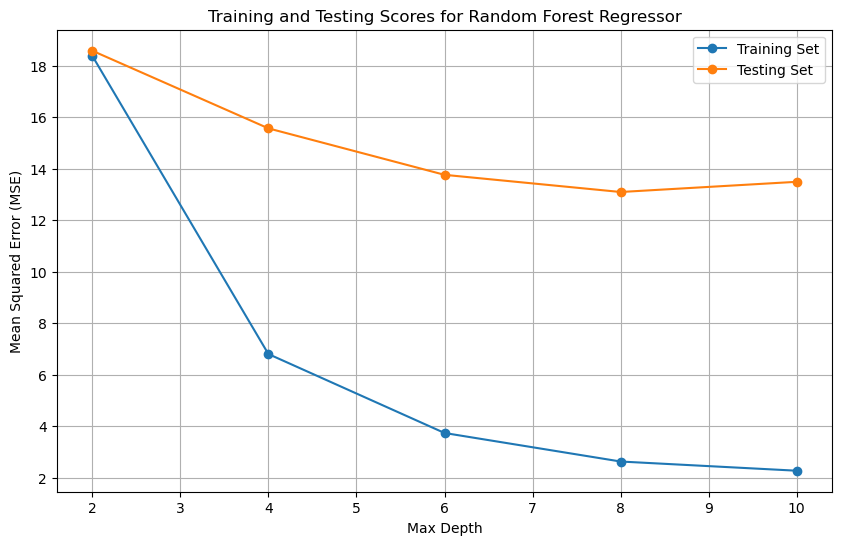

In [17]:

train_scores = []
test_scores = []


max_depth_values = [2, 4, 6, 8, 10]


for max_depth in max_depth_values:
    
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    
    
    y_train_pred = model.predict(X_train)
    
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_scores.append(train_mse)
    
    
    y_test_pred = model.predict(X_test)
    
    
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_scores.append(test_mse)


plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, marker='o', linestyle='-', label='Training Set')
plt.plot(max_depth_values, test_scores, marker='o', linestyle='-', label='Testing Set')
plt.title('Training and Testing Scores for Random Forest Regressor')
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# maybe the data is overfitted

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# a model with a maximum depth of 1 suffers from high bias and low variance, leading to underfitting. 
# and a model with a maximum depth of 10 suffers from low bias and high variance, leading to overfitting

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [18]:

optimal_max_depth = 6
optimal_model = RandomForestRegressor(max_depth=optimal_max_depth, random_state=42)
optimal_model.fit(X_train, y_train)

y_pred = optimal_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Optimal Model with max_depth={optimal_max_depth}")
print(f"Mean Squared Error on Test Set: {mse:.2f}")

Optimal Model with max_depth=6
Mean Squared Error on Test Set: 13.76


### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# the data collected during that time may not accurately reflect current market dynamics.

# there might be important factores missing, factors related to modern amenities, technology, and sustainability have become increasingly important in the real estate market today.

# the models robustness may be not ideal since some underlying patterns may have changed 

#data collected in a city may not be directly applicable to a rural city